#                **Marketing Campaign for Banking Products**

### **1.Importing the datasets and libraries, check datatype, statistical summary, shape, null values** 

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

In [185]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (2).xlsx


In [186]:
import io
df = pd.read_excel( 'Bank_Personal_Loan_Modelling.xlsx' , 'Data' )

In [187]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [188]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [189]:
df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [191]:
df.shape

(5000, 14)

In [192]:
df.size

70000

In [193]:
df.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [194]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [195]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### **2. Need to clean the data for any of the variables**

In [196]:
df[df['Experience'] < 0]['Experience'].count()

52

In [197]:
dfExp = df.loc[df['Experience'] > 0]
negExp = df.Experience < 0
newlist = df.loc[negExp]['ID'].tolist() 
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [198]:
for id in newlist:
    age = df.loc[np.where(df['ID'] == id)]["Age"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age)]
    exp = df_filtered['Experience'].median()
    df.loc[df.loc[np.where(df['ID'] == id)].index, 'Experience'] = exp

In [199]:
df[df['Experience'] < 0]['Experience'].count() 

0

### **3. EDA: Study the data distribution in each attribute and target variable**

In [200]:
#number of unique in each column
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [201]:
#number of people with zero mortgage
df[df['Mortgage'] == 0]['Mortgage'].count()

3462

In [202]:
#number of people with zero credit card spending per month
df[df['CCAvg'] == 0]['CCAvg'].count()

106

In [203]:
#value counts of all categorical columns
df.count()

ID                    5000
Age                   5000
Experience            4971
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [204]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [205]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [206]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [207]:
df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [208]:
df = df.dropna(subset=['Experience'])

In [209]:
df.isnull().sum().sort_values()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

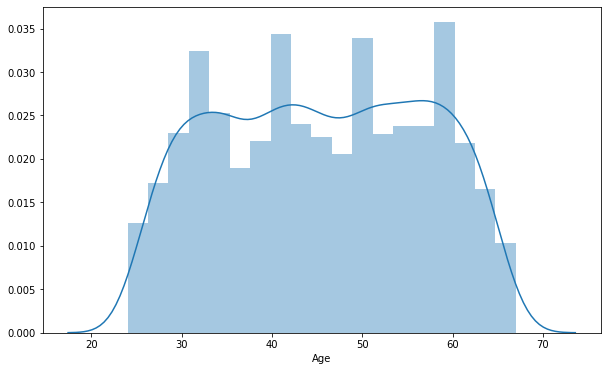

In [210]:
#Univariate Analysis
sns.distplot(df.Age)

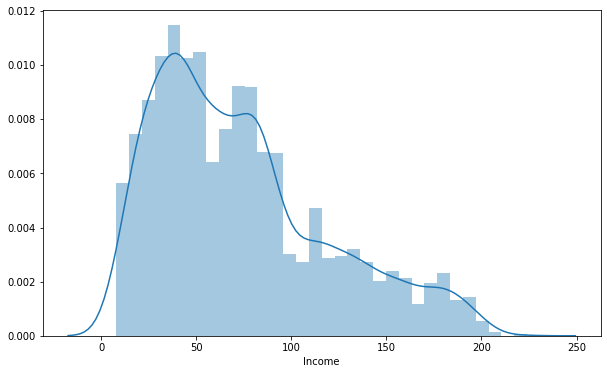

In [211]:
sns.distplot(df.Income)

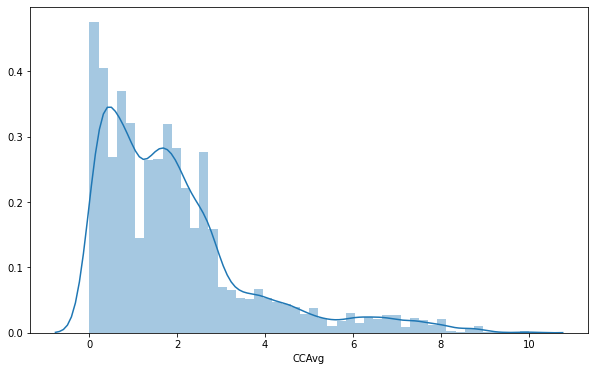

In [212]:
sns.distplot(df.CCAvg)

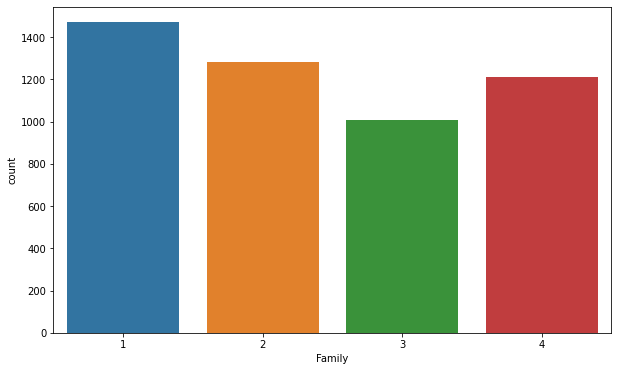

In [213]:
sns.countplot(df.Family)

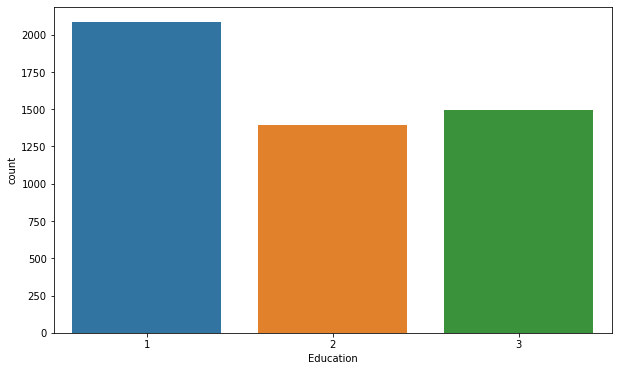

In [214]:
sns.countplot(df.Education)

Text(0, 0.5, 'Income')

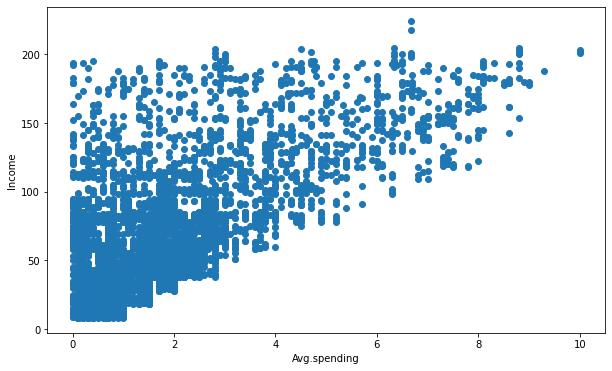

In [215]:
#Multivariate Analysis
plt.scatter(df['CCAvg'],df['Income'])
plt.xlabel('Avg.spending')
plt.ylabel('Income')

Text(0, 0.5, 'Mortgage')

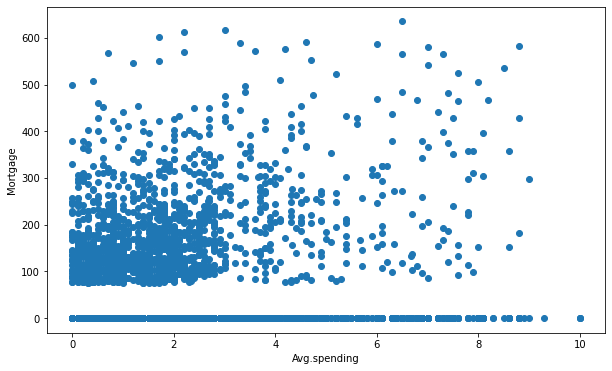

In [216]:
plt.scatter(df['CCAvg'],df['Mortgage'])
plt.xlabel('Avg.spending')
plt.ylabel('Mortgage')

Text(0, 0.5, 'Mortgage')

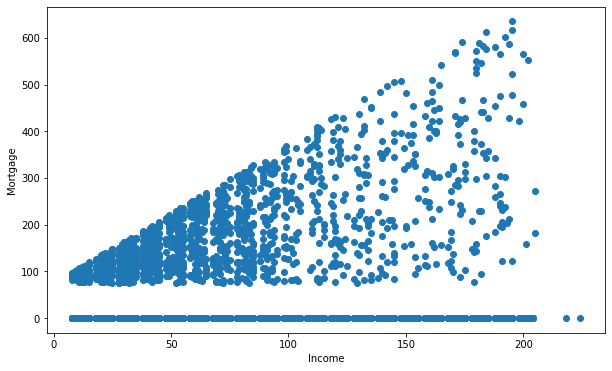

In [217]:
plt.scatter(df['Income'],df['Mortgage'])
plt.xlabel('Income')
plt.ylabel('Mortgage')

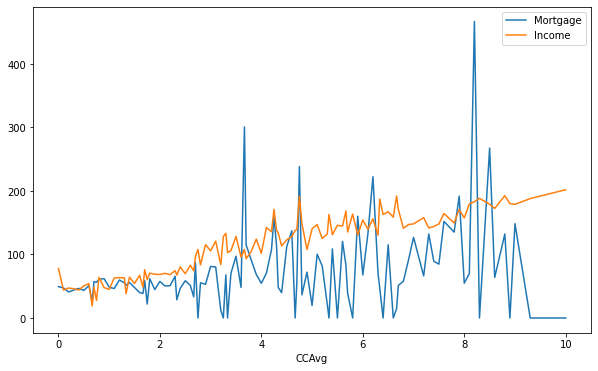

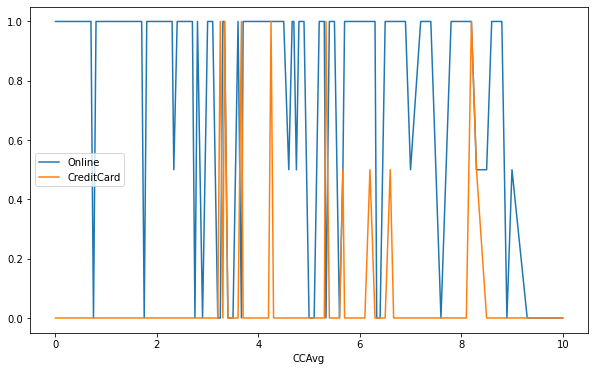

In [218]:
df_group = df.groupby('CCAvg').mean()[['Mortgage','Income']]
df_group.plot.line()
df_group2 = df.groupby('CCAvg').median()[['Online','CreditCard']]
df_group2.plot.line()

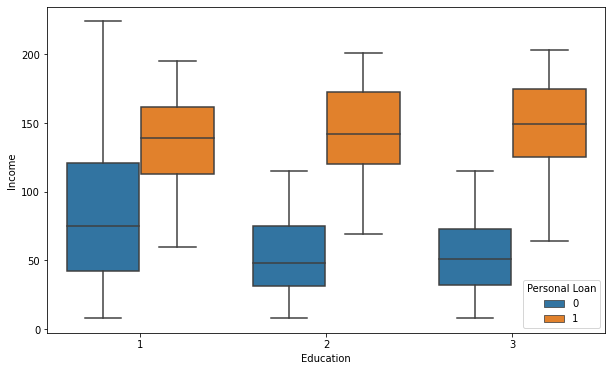

In [219]:
sns.boxplot(x='Education' ,y='Income' ,hue='Personal Loan' ,data=df)

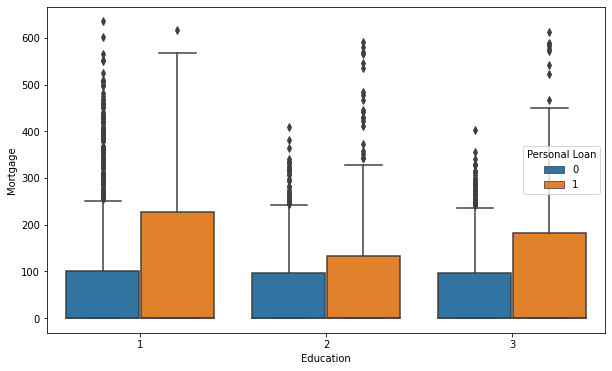

In [220]:
sns.boxplot(x="Education" ,y='Mortgage' ,hue="Personal Loan" , data=df)

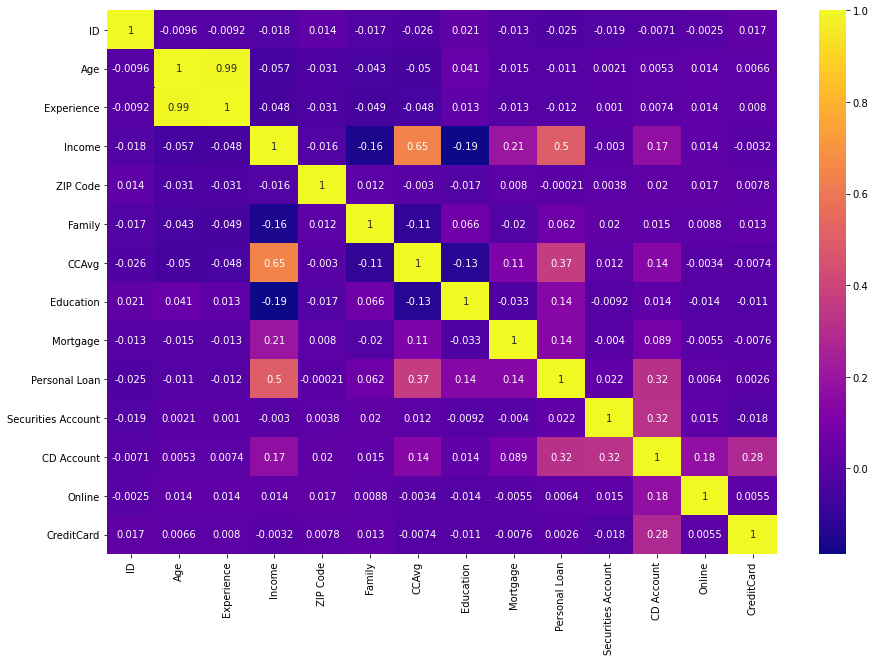

In [221]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='plasma',annot=True)

In [222]:
#comparing similarity in age and correlation
correlation= df['Age'].corr(df['Experience'])
correlation

0.9941590261692546

### **4. Applying necessary transformations for the feature variables**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7947f4de80>,
      dtype=object)

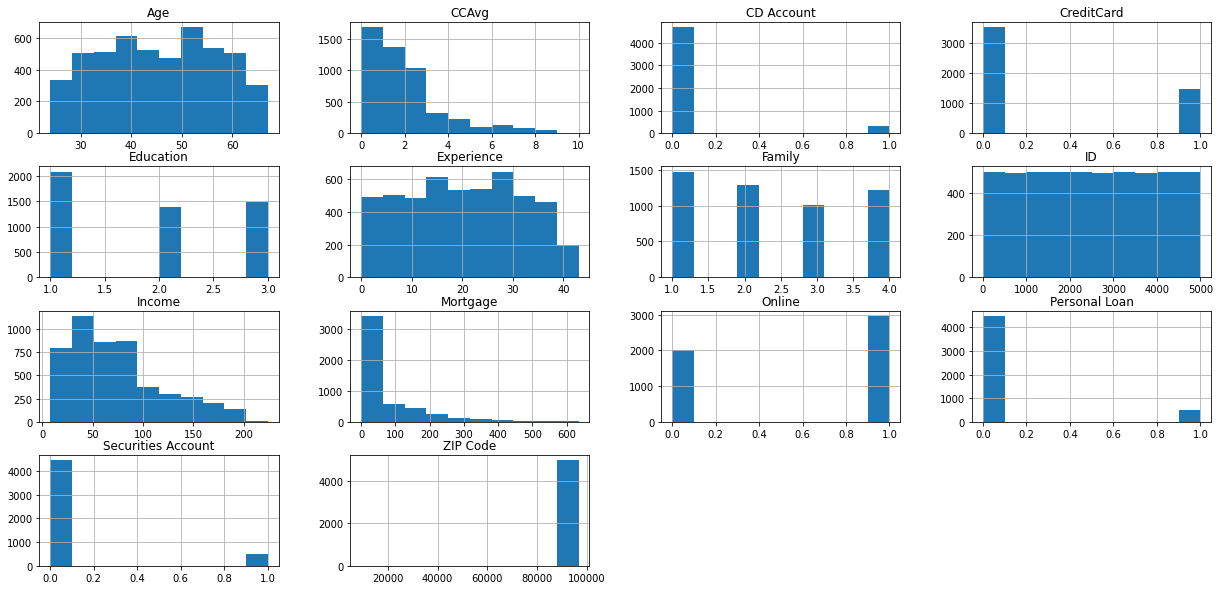

In [223]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize = [21,10])

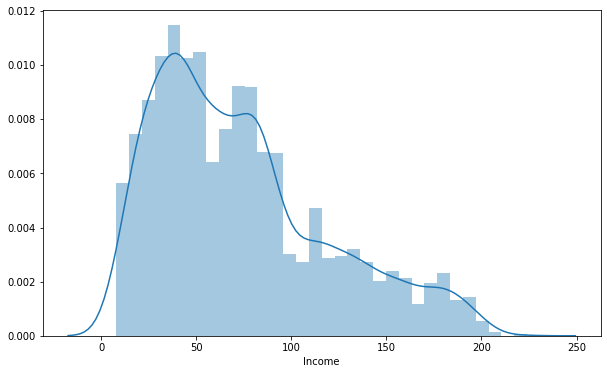

In [224]:
sns.distplot(df.Income)

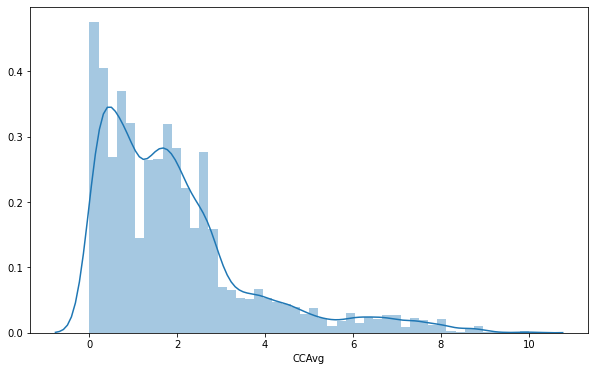

In [225]:
sns.distplot(df.CCAvg)

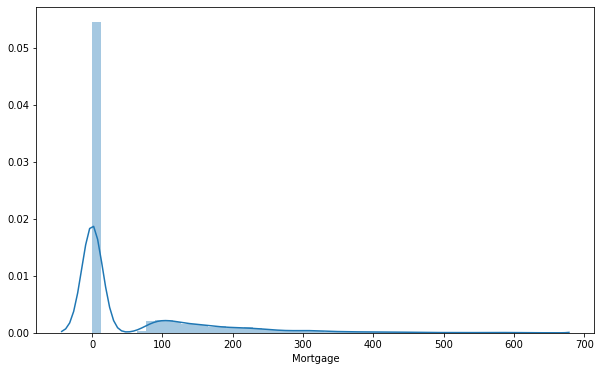

In [226]:
sns.distplot(df.Mortgage)

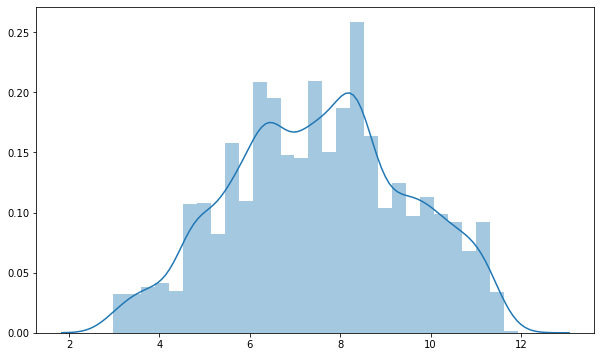

In [227]:
from sklearn.preprocessing import PowerTransformer as pt
pwt = pt(method = "yeo-johnson" , standardize=False)
pwt.fit(df_x["Income"].values.reshape(-1,1))
temp = pwt.transform(df_x["Income"].values.reshape(-1,1))
sns.distplot(temp)

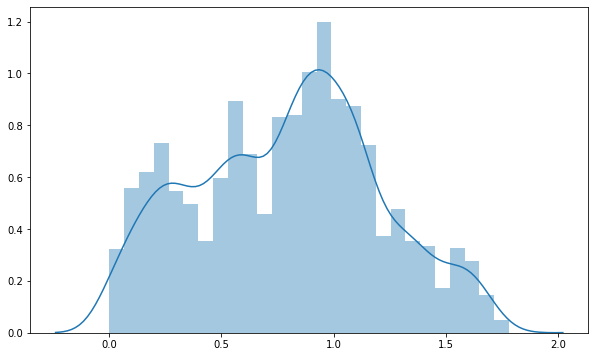

In [228]:
from sklearn.preprocessing import PowerTransformer as pt
pwt1 = pt(method="yeo-johnson" , standardize=False)
pwt1.fit(df_x["CCAvg"].values.reshape(-1,1))
temp1 = pwt1.transform(df_x["CCAvg"].values.reshape(-1,1))
sns.distplot(temp1)

### **5. Normalizing data and splitting the data into training and test set in the ratio of 70:30 respectively**

In [229]:
from sklearn.model_selection import train_test_split
target = 'Personal Loan'
df_x = df.drop(target, axis='columns',inplace = False)
df_y = df[target]

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=0, stratify=df_y)

**6**.**Logistic** **Regression** **model** **to predict the likelihood of a customer buying personal** **loans**

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

In [231]:
target = 'Personal Loan'
df_x = df.drop(target,axis='columns',inplace=False)
df_y = df[target]

x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.30,random_state=100,stratify=df_y)

In [232]:
Log_r = LogisticRegression(max_iter=1000)
Log_r.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [233]:
print("Testing Accuracy",Log_r.fit(x_train,y_train).score(x_test,y_test))

Testing Accuracy 0.9416890080428955


In [234]:
print("Training Accuracy",Log_r.fit(x_train,y_train).score(x_train,y_train))

Training Accuracy 0.937625754527163


**7. All the metrics related for evaluating the model performance**

In [235]:
from sklearn.metrics import classification_report
y_pred = Log_r.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1348
           1       0.76      0.58      0.66       144

    accuracy                           0.94      1492
   macro avg       0.86      0.78      0.81      1492
weighted avg       0.94      0.94      0.94      1492

0.9416890080428955
[[1321   27]
 [  60   84]]


In [236]:
Log_r_prob = Log_r.predict_proba(x_test)
fpr,tpr,thresholds = roc_curve(y_test,Log_r_prob[:,1])
roc_ac = auc(fpr,tpr)
print("Area under ROC curve : %f" %roc_ac)

Area under ROC curve : 0.937289


In [237]:
pr_test_x = Log_r.predict(x_test)
pr_train_x = Log_r.predict(x_train)

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print("Recall : ",recall_score(y_test , pr_test_x))
print("Precision : ", precision_score(y_test , pr_test_x))
print("F1 Score : ", f1_score(y_test , pr_test_x))
print("Roc Auc Score : ", roc_auc_score(y_test , pr_test_x))

Recall :  0.5833333333333334
Precision :  0.7567567567567568
F1 Score :  0.6588235294117648
Roc Auc Score :  0.7816518298714146


**8. Comparing various other classification algorithms**

In [238]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

In [239]:
col = df.columns
sc = StandardScaler()
scaled_train_x = sc.fit_transform(x_train)
scaled_test_x = sc.fit_transform(x_test)
L_r = LogisticRegression()
L_r.fit(scaled_train_x,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [240]:
y_pred1 = L_r.predict(scaled_test_x)
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1348
           1       0.81      0.64      0.72       144

    accuracy                           0.95      1492
   macro avg       0.89      0.81      0.84      1492
weighted avg       0.95      0.95      0.95      1492

0.9510723860589813
[[1327   21]
 [  52   92]]


In [242]:
pred_test_x1 = L_r.predict(scaled_test_x)
pred_train_x1 = L_r.predict(scaled_train_x)
print("Recall : ",recall_score(y_test , pred_test_x1))
print("Precision : ", precision_score(y_test , pred_test_x1))
print("F1 Score : ", f1_score(y_test , pred_test_x1))
print("Roc Auc Score : ", roc_auc_score(y_test , pred_test_x1))

Recall :  0.6388888888888888
Precision :  0.8141592920353983
F1 Score :  0.7159533073929961
Roc Auc Score :  0.811655126937026


In [243]:
def draw(actual, predicted):
  con_mat=confusion_matrix(actual, predicted)
  sns.heatmap(con_mat, annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
  plt.ylabel("OBSERVED")
  plt.xlabel("PREDICTED")
  plt.show()

CONFUSION MATRIX: 


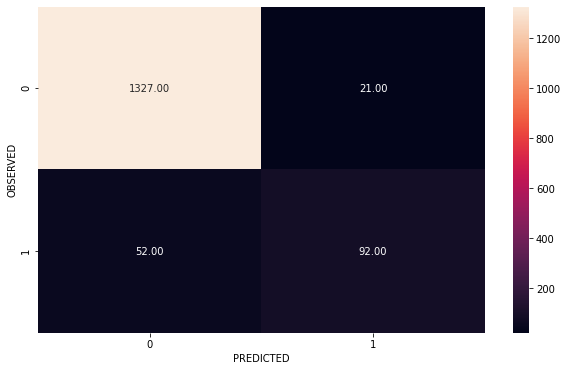

None


In [244]:
print("CONFUSION MATRIX: ")
print(draw(y_test , pred_test_x1))

In [245]:
#DECISION TREE

from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(criterion='entropy' , random_state=1)
d_tree.fit(scaled_train_x,y_train)
y_pred=d_tree.predict(scaled_test_x)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1348
           1       0.95      0.88      0.91       144

    accuracy                           0.98      1492
   macro avg       0.97      0.93      0.95      1492
weighted avg       0.98      0.98      0.98      1492

0.9832439678284183
[[1341    7]
 [  18  126]]


In [246]:
pred_test_x2 = d_tree.predict(scaled_test_x)
pred_train_x2 = d_tree.predict(scaled_train_x)
print("Recall : ",recall_score(y_test , pred_test_x2))
print("Precision : ", precision_score(y_test , pred_test_x2))
print("F1 Score : ", f1_score(y_test , pred_test_x2))
print("Roc Auc Score : ", roc_auc_score(y_test , pred_test_x2))


Recall :  0.875
Precision :  0.9473684210526315
F1 Score :  0.9097472924187725
Roc Auc Score :  0.9349035608308606


CONFUSION MATRIX: 


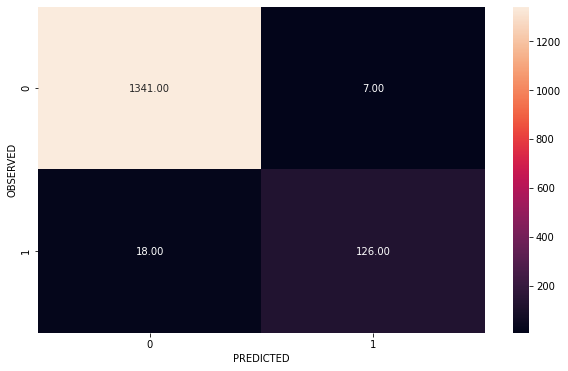

None


In [247]:
print("CONFUSION MATRIX: ")
print(draw(y_test , pred_test_x2))

In [248]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier(criterion='entropy',n_estimators=150,max_features=6,random_state=14)
r_forest.fit(scaled_train_x,y_train)
y_pred=r_forest.predict(scaled_test_x)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1348
           1       1.00      0.87      0.93       144

    accuracy                           0.99      1492
   macro avg       0.99      0.93      0.96      1492
weighted avg       0.99      0.99      0.99      1492

0.9872654155495979
[[1348    0]
 [  19  125]]


In [249]:
pred_test_x3 = r_forest.predict(scaled_test_x)
pred_train_x3 = r_forest.predict(scaled_train_x)
print("Recall : ",recall_score(y_test , pred_test_x3))
print("Precision : ", precision_score(y_test , pred_test_x3))
print("F1 Score : ", f1_score(y_test , pred_test_x3))
print("Roc Auc Score : ", roc_auc_score(y_test , pred_test_x3))

Recall :  0.8680555555555556
Precision :  1.0
F1 Score :  0.929368029739777
Roc Auc Score :  0.9340277777777778


CONFUSION MATRIX: 


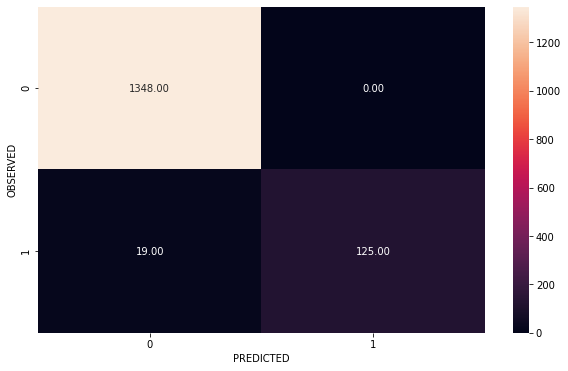

None


In [250]:
print("CONFUSION MATRIX: ")
print(draw(y_test , pred_test_x3))

In [251]:
#K-Nearest Neighbor

from sklearn.metrics import roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(scaled_train_x,y_train)

y_pred=knn_model.predict(scaled_test_x)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1348
           1       0.88      0.53      0.66       144

    accuracy                           0.95      1492
   macro avg       0.91      0.76      0.82      1492
weighted avg       0.94      0.95      0.94      1492

0.9477211796246648
[[1337   11]
 [  67   77]]


In [252]:
pred_test_x4 = knn_model.predict(scaled_test_x)
pred_train_x4 = knn_model.predict(scaled_train_x)
print("Recall : ",recall_score(y_test , pred_test_x4))
print("Precision : ", precision_score(y_test , pred_test_x4))
print("F1 Score : ", f1_score(y_test , pred_test_x4))
print("Roc Auc Score : ", roc_auc_score(y_test , pred_test_x4))

Recall :  0.5347222222222222
Precision :  0.875
F1 Score :  0.6637931034482758
Roc Auc Score :  0.7632809924167491


CONFUSION MATRIX: 


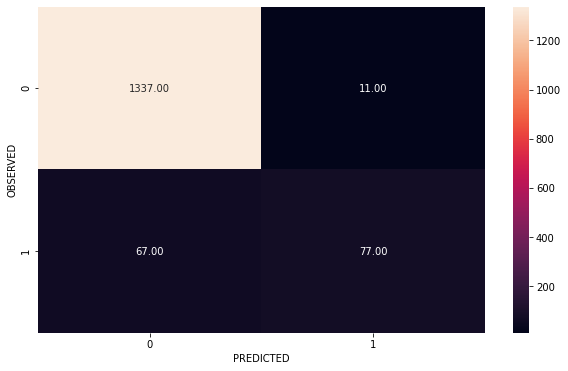

None


In [253]:
print("CONFUSION MATRIX: ")
print(draw(y_test , pred_test_x4))

**9. Business understanding of the model**

In [254]:
from sklearn import model_selection

models = []
models.append(('LOG_REG', LogisticRegression(max_iter=1000)))
models.append(('DEC_TREE', DecisionTreeClassifier()))
models.append(('RAND_FOREST', RandomForestClassifier()))

# evaluate each model in turn

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, df_x, df_y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
 


LOG_REG: 0.913297 (0.011714)
DEC_TREE: 0.980090 (0.010014)
RAND_FOREST: 0.985918 (0.002846)


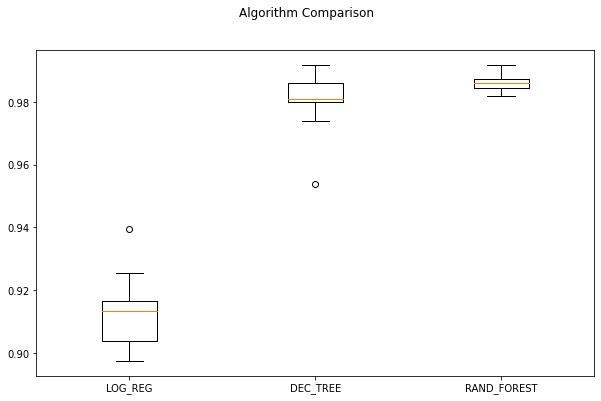

In [255]:
# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**CONCLUSION**

The objective of the project is **"The classification goal is to predict the likelihood of a liability customer buying personal loans".**

The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers.

Hence, from three classification algorithms which were used in this study and from the above respective results i feel **Random Forest algorithm** can be selected as the final model because it have the highest accuracy.
